# 8장(트리)-프로그래밍 실습

## 8-1.트리의 기본 개념

- networkx에서 기본으로 제공하는 그래프는 시자점을 고정할 수 없어 pydot 그래프 레이아웃(또는 graphviz 등)을 이용하여야하며 이를 위해 해당 라이브러리를 설치해야한다.

In [ ]:
!pip install pydot

### [예제 8-1] 트리 판단하기
- (T, v0) 유향 그래프:  v0 내차수는 0, 나머지 정점의 내차수는 1
- v0 유일한 루트 노드
- T에는 어떤 순환도 존재하지 않느다.

In [6]:
import numpy as np

# 숫자 순서쌍으로 변환
def convertEdgeToNum(V, E):
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    if any(isinstance(v, str) for v in V):
        data  = { v:idx+1 for idx, v in enumerate(V) }  # V 원소 숫자로 표시
        result= [(data[v1], data[v2])  for v1, v2 in E] # E 순서쌍으로 표시    
        return result
    else:
        return E

    
# 유향 Tree 판단하기
def isDiTree(V, E): 
    isTree = True  # Tree flag

    E = convertEdgeToNum(V, E) # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환
    
    # 인접 행렬 만들기
    adj = [[0 for _ in range(len(V))] for _ in range(len(V))]
    for t in E:
        src, dest = t
        adj[src-1][dest-1] = 1
        adj[dest-1][src-1] = 1
    matrix = np.array(adj)        
    
   # 유향 그래프 정점의 차수
    degrees1 = np.sum(matrix, axis=0).tolist()  # 내차수
    degrees2 = np.sum(matrix, axis=1).tolist()  # 외차
    for idx, v in enumerate(degrees1):
        print(f'정점 [{V[idx]}]의 내차수: {v} 외차수: {degrees2[idx]} ')        
        result.append((v, degrees2[idx]))            
        if v > 1: isTree = False  # 정점들의 차수가 0 또는 1이 아니면 트리 아님  
                
    # 트리 판단
    if degrees1.count(0) >1: isTree = False # 내차수가 0인 갯수가 1개가 아니면
    if degrees1.count(0)==0: isTree = False
        
    if isTree: print('해당 그래프는 트리입니다.')
    else: print('해당 그래프는 트리가 아닙니다.')
        
    return isTree    

# 트리 그리기
def drawTree(V, E):
    from IPython.core.display import Image
    import networkx as nx

    # G = nx.Graph() # Graph(무향 그래프)
    G = nx.DiGraph() # DirectedGraph(유향 그래프)

    G.add_nodes_from(V) # 점 추가
    G.add_edges_from(E) # 간선 추가

    d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
    d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
#     d1.set_rankdir("LR")   # 수평방향 --> 이 코드 없으면 수직방향
    d1.set_margin(1)
    img = Image(d1.create_png(), width=300)
    display(img)

In [7]:
# 유향 그래프 트리 판단  
print('-'*50)
V = ['a','b','c','d']
E = [('a','c'),('b','d')]
isDiTree(V, E)
drawTree(V, E)
    
print('-'*50)
E = [('a','b'),('a','c'),('b','d'),('c','d')]
isDiTree(V, E)
drawTree(V, E)

print('-'*50)
E = [('a','b'),('b','d'),('c','a'),('d','c'),]
isDiTree(V, E)
drawTree(V, E)

--------------------------------------------------
정점 [a]의 내차수: 1 외차수: 1 


NameError: name 'result' is not defined

### [예제 8-2] 루트 노드 찾기

- **가로 방향 유향 그래프 그리기**

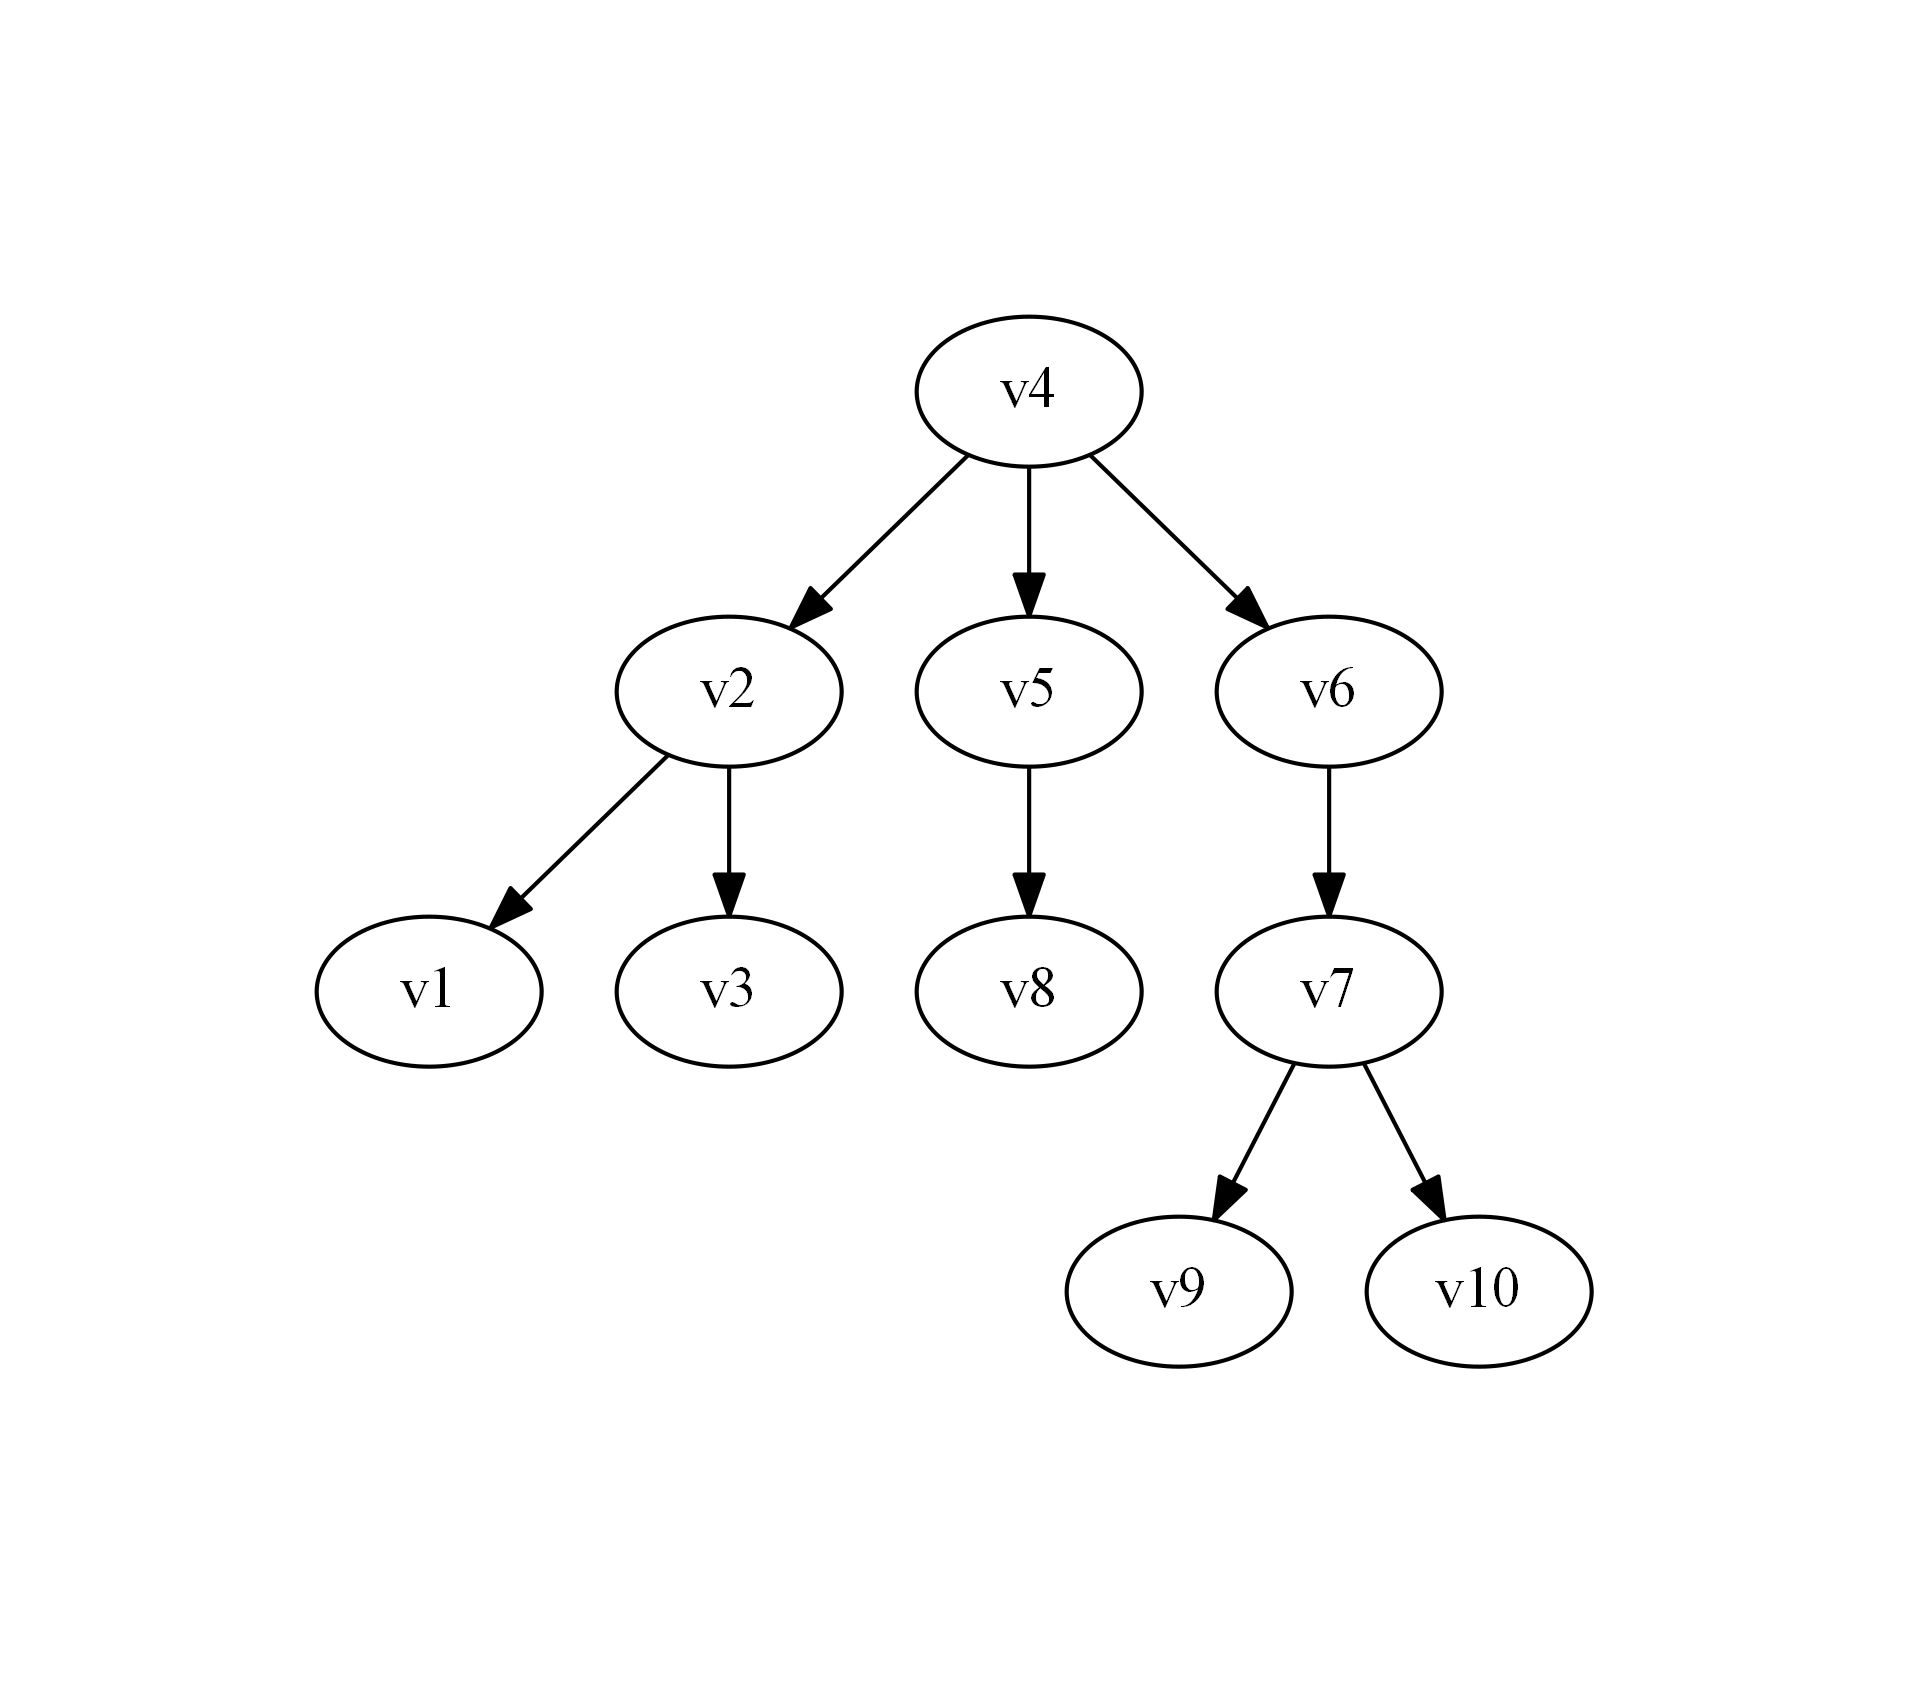

In [1]:
def drawTree(V, E, Gtype=0, D=0):  # 기본 Gtype=무향.D=가로방향 그래프
    from IPython.core.display import Image
    import networkx as nx

    if Gtype==0: G = nx.Graph() # Graph(무향 그래프)
    else: G = nx.DiGraph()      # DirectedGraph(유향 그래프)

    G.add_nodes_from(V) # 점 추가
    G.add_edges_from(E) # 간선 추가

    d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph
    d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
    if Gtype==0: d1.set_rankdir("LR")   # 수평방향 --> 이 코드 없으면 수직방향
    d1.set_margin(1)
    img = Image(d1.create_png(), width=300)
    display(img)

V = [f'v{i}' for i in range(1,11)]
E = [('v2','v3'),('v2','v1'),('v4','v5'),('v4','v6'),('v5','v8'),
     ('v6','v7'),('v4','v2'),('v7','v9'),('v7','v10')]

drawTree(V, E, 1, 0)

- **세로 방향 유향 그래프 그리기**

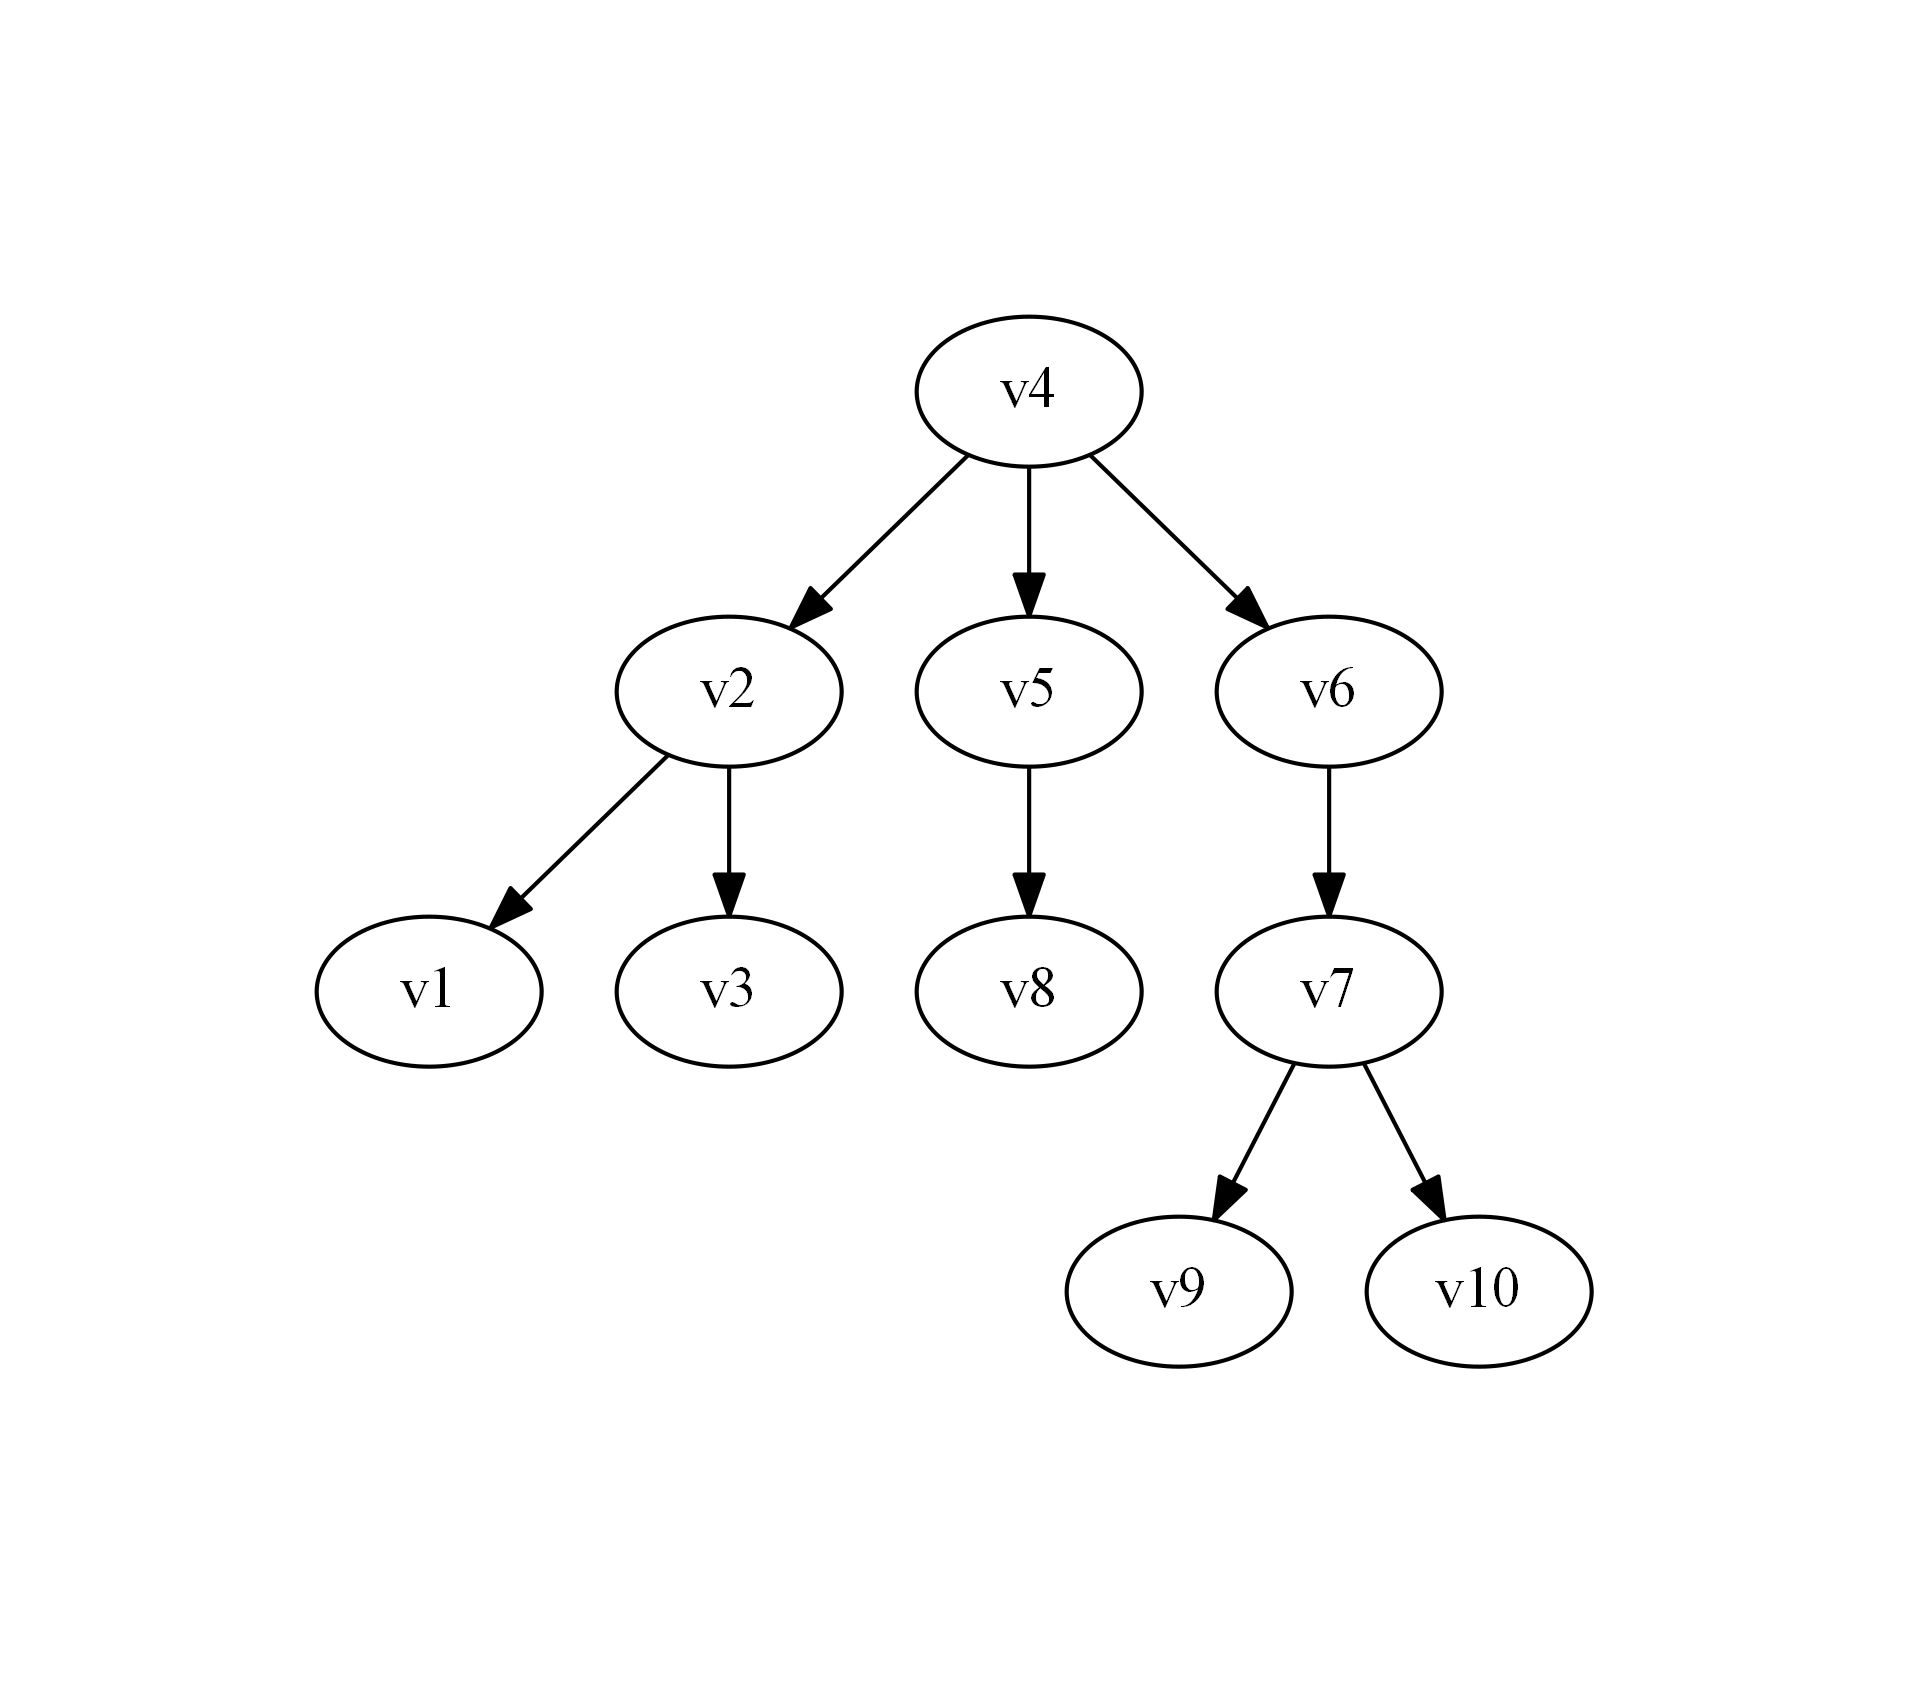

In [74]:
drawTree(V, E, 1, 1)

### [예제 8-4] 트리 활용 : 결정트리(Decision Tree)

- [참고] https://iq.opengenus.org/fake-coin-problem/

In [108]:
import random
real_coin = 1
fake_coin = 0
    
# 임의의 코인 조건 만들기
def randomize_coins(n):
    global coins
        
    coins = [real_coin] * (n - 1) + [fake_coin] * (1) # 코인 리스트 만들기
    random.shuffle(coins)  # coins 리스트 무작위 섞기
    print(f'coins={coins}')
    return coins

# fake코인 찾기
def findFakeCoin(n):
    trycnt = 1
    for i in range(1,n):
        if coins[0]==coins[i]:
            pass
        elif coins[0]<coins[i]:
            return print(f'try[{trycnt}] 1th coin is the fake one')
        else:
            return print(f'try[{trycnt}] {i+1}th coin is the fake one')
        trycnt+=1
        
n = int(input("Enter the number of coins:"))
makeCoinTable(n)   # 코인 리스트 만들기
findFakeCoin(n)   # find fake coin

Enter the number of coins:8
coins=[0, 1, 1, 1, 1, 1, 1, 1]
try[1] 1th coin is the fake one


In [107]:
import random
real_coin = 1
fake_coin = 0
trycnt = 0

def randomize_coins(n):  
    global coins 
    coins= [real_coin] * (n - 1) + [fake_coin] * (1)
    random.shuffle(coins)
    print(coins)
    return coins
def testing_fake_one(x,y,n):  
    global trycnt
    trycnt += 1
    if n==1:
        print(1,"st coin is the fake one")
    else:
            if n % 3==0 or n%3==1:
                A=[coins[i] for i in range(x,x+(y-x)//3 )]
                B=[coins[i] for i in range(x+(y-x)//3,x+2*(y-x)//3)]
                C=[coins[i] for i in range(x+2*(y-x)//3,y)]
                coins_index_A=[i+1 for i in range(x,x+(y-x)//3)]
                coins_index_B=[i+1 for i in range(x+(y-x)//3,x+2*(y-x)//3)]
                coins_index_C=[i+1 for i in range(x+2*(y-x)//3,y)]
                if sum(A)<sum(B):
                    if len(A)>1:
                        testing_fake_one(x,x+(y-x)//3,(y-x)//3)
                    if len(A)==1:
                        return print(coins_index_A[0],"th coin is the fake coin")
                elif sum(A)>sum(B):
                    if len(B)>1:
                        testing_fake_one(x+(y-x)//3,x+2*(y-x)//3,(y-x)//3)
                    if len(B)==1:
                        return print(coins_index_B[0],"th coin is the fake coin")
                else:
                    if len(C)>1:
                        testing_fake_one(x+2*(y-x)//3,y,y-2*(y-x)//3-x)
                    if len(C)==1:
                        return print(coins_index_C[0],"th coin is the fake coin")
            else:
                A=[coins[i] for i in range(x,x+(y-x)//3+1)]
                B=[coins[i] for i in range(x+(y-x)//3+1,x+2*(y-x)//3+1)]
                C=[coins[i] for i in range(x+2*(y-x)//3+1,y)]
                coins_index_A=[i+1 for i in range(x,x+(y-x)//3+1)]
                coins_index_B=[i+1 for i in range(x+(y-x)//3+1,x+2*(y-x)//3+1)]
                coins_index_C=[i+1 for i in range(x+2*(y-x)//3+1,y)]
                if sum(A)<sum(B):
                    if len(A)>1:
                        testing_fake_one(x,x+(y-x)//3+1,(y-x)//3+1)
                    if len(A)==1:
                        return print(coins_index_A[0],"th coin is the fake coin")
                elif sum(A)>sum(B):
                    if len(A)>1:
                        testing_fake_one(x+(y-x)//3+1,x+2*(y-x)//3+1,(y-x)//3)
                    if len(A)==1:
                        return print(coins_index_B[0],"th coin is the fake coin")
                else:
                    if len(A)>1:
                        testing_fake_one(x+2*(y-x)//3+1,y,y-2*(y-x)//3-1-x)
                    if len(A)==1:
                        return print(coins_index_C[0],"th coin is the fake coin")
            
n=int(input("Enter the number of coins:"))
randomize_coins(n)
testing_fake_one(0,n,n)
trycnt

Enter the number of coins:8
[1, 1, 1, 1, 1, 1, 1, 0]
8 th coin is the fake coin


2

-------------------------------

## 8-2. 레이블을 갖는 트리와 최소 스패닝 트리

### 최소 스패닝 트리
- 그래프의 최소 연결 부분을 갖는 트리 
- Spanning Tree = 신장 트리 = 스패닝 트리
- 모든 정점들이 연결 되어 있어야 하고 사이클을 포함해서는 안된다.
- 정점 n은 n-1개의 간선을 갖는다.

#### # Prim Algorithm

#### # Kruskal Algorithm

####  # anytree - 트리를 쉽게 표현하는 라이브러리

In [ ]:
V = [1,2,3,4,5,6,7,8,9]
T = [(2,3),(2,1),(4,5),(4,6),(5,8),(6,7),(4,2),(7,9),(7,10)]
drawTree(V, T, 1, 1)  # T관계 순서쌍을 그래프로 그려줌.

In [111]:
!pip install anytree


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached anytree-2.8.0-py2.py3-none-any.whl (41 kB)


4
├── 2
│   ├── 1
│   └── 3
├── 5
│   └── 8
└── 6
    └── 7
        ├── 9
        └── 10
digraph tree {
    "4";
    "2";
    "1";
    "3";
    "5";
    "8";
    "6";
    "7";
    "9";
    "10";
    "4" -> "2";
    "4" -> "5";
    "4" -> "6";
    "2" -> "1";
    "2" -> "3";
    "5" -> "8";
    "6" -> "7";
    "7" -> "9";
    "7" -> "10";
}


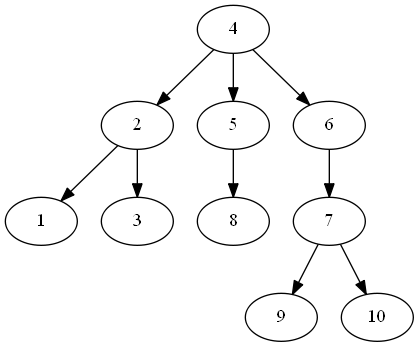

In [7]:
# 트리 구조 만들기
from anytree import Node, RenderTree
v4 = Node('4')
v2 = Node('2', parent=v4)
v5 = Node('5', parent=v4)
v6 = Node('6', parent=v4)
v1 = Node('1', parent=v2)
v3 = Node('3', parent=v2)
v8 = Node('8', parent=v5)
v7 = Node('7', parent=v6)
v9 = Node('9', parent=v7)
v10 = Node('10', parent=v7)

for pre, fill, node in RenderTree(v4):
    print("%s%s" % (pre, node.name))

# 트리 그리기    
from anytree.exporter import DotExporter
for line in DotExporter(v4):
    print(line)
    
# 이미지 파일로 만들기
from IPython.display import Image
DotExporter(v4).to_picture('test.png')
display(Image(filename="test.png"))

-------------------------

## 7-3. 트리 탐방 알고리즘
- 전위 탐방(preorder)
- 중위 탐방(inorder)
- 후위 탐방(postorder

### [예제8-8] 트리 탐방 알고리즘
- 대수식 (a-(b+c))*d 트리로 표현하기

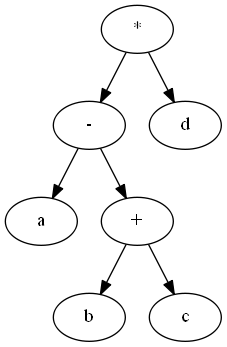

In [21]:
# anytree 구조 만들기
from anytree import Node, RenderTree
v1 = Node('*')
v2 = Node('-', parent=v1)
v3 = Node('d', parent=v1)
v4 = Node('a', parent=v2)
v5 = Node('+', parent=v2)
v6 = Node('b', parent=v5)
v7 = Node('c', parent=v5)

# 이미지 파일로 만들기
from IPython.display import Image
DotExporter(v1).to_picture('test.png')
display(Image(filename="test.png"))

In [22]:
'''[참고]: 파이선에서 언더바가 2개 붙은 것(__던더라고 읽음)은 얘약해 놓은 것이라는 의미
클래스에서는 함수를 Method 라고 부른다.
클래스에서 자주 사용되는 __init__ 형태와 같은 것을 Magic Method라고 부른다 
__init__: 초기화 생성자(인스턴스를 생성하면서 필드 값을 초기화 하는 함수)
'''
# 자기 자신의 값인 item과 위치 left, right를 가지는 Node
class Node:
    def __init__(self, item):
        self.item = item
        self.left = None
        self.right = None
        
# 각 노드를 엮어주기 위하여 BinaryTree를 만든다.
class BinaryTree():
    def __init__(self):                         #트리 생성
        self.root = None

    # 전위 순회(탐방) : VLR 순서(Root->Left->Right)
    def preorder(self, n):
        if n != None:
            print(n.item, '', end='')           # 노드 방문
            if n.left:
                self.preorder(n.left)           # 왼쪽 서브트리 순회
            if n.right:
                self.preorder(n.right)          # 오른쪽 서브트리 순회
                
    # 중위 순회(탐방) : LVR (Left->Root->Right)
    def inorder(self, n):
        if n != None:
            if n.left:
                self.inorder(n.left)
            print(n.item, '', end='')           # 노드 방문
            if n.right:
                self.inorder(n.right)
    
    # 후위 순회(탐방) : LRV (Left->Right->Root)
    def postorder(self, n):
        if n != None:
            if n.left:
                self.postorder(n.left)
            if n.right:
                self.postorder(n.right)
            print(n.item, '', end='')           # 노드 방문

            
# 각 노드 생성
n1 = Node("*")
n2 = Node("-")
n3 = Node("d")
n4 = Node("a")
n5 = Node("+")
n6 = Node("b")
n7 = Node("c")

# 순서에 맞게 노드 엮기
tree = BinaryTree()

tree.root= n1
n1.left  = n2
n1.right = n3
n2.left  = n4
n2.right = n5
n5.left  = n6
n5.right = n7


print('전위 순회: ', end='')
tree.preorder(tree.root)
print()

print('후위 순회 : ', end='')
tree.postorder(tree.root)
print()

print('중위 순회 : ', end='')
tree.inorder(tree.root)
print()

전위 순회: * - a + b c d 
후위 순회 : a b c + - d * 
중위 순회 : a - b + c * d 


---------------------------

THE END